# ENSO: Nino SST Indices (Oceanic Niño Index (ONI)

In [51]:
from esmvalcore.dataset import Dataset

In [52]:
dataset = Dataset(
    short_name='ts',
    project='OBS',
    dataset='HadISST',
    type="reanaly",
    version=1,
    tier=2,
    mip="Amon"
)

In [53]:
obs = dataset.load()

# Calculate Nino3.4 index

In [54]:
from esmvalcore.preprocessor import extract_time
from esmvalcore.preprocessor import climate_statistics
from esmvalcore.preprocessor import extract_region
from esmvalcore.preprocessor import anomalies
from esmvalcore.preprocessor import area_statistics
from esmvalcore.preprocessor import convert_units

In [55]:
nino34_region = {"start_longitude": 170, "end_longitude": 280, "start_latitude": -5, "end_latitude": 5}

In [56]:
obs1 = extract_time(obs, start_year=1980, start_month=1, start_day=1, end_year=2000, end_month=1, end_day=1) 
obs2 = extract_region(obs1, **nino34_region)
obs2 = area_statistics(obs2, operator="mean")
ts_obs_anm = anomalies(obs2, period="month")

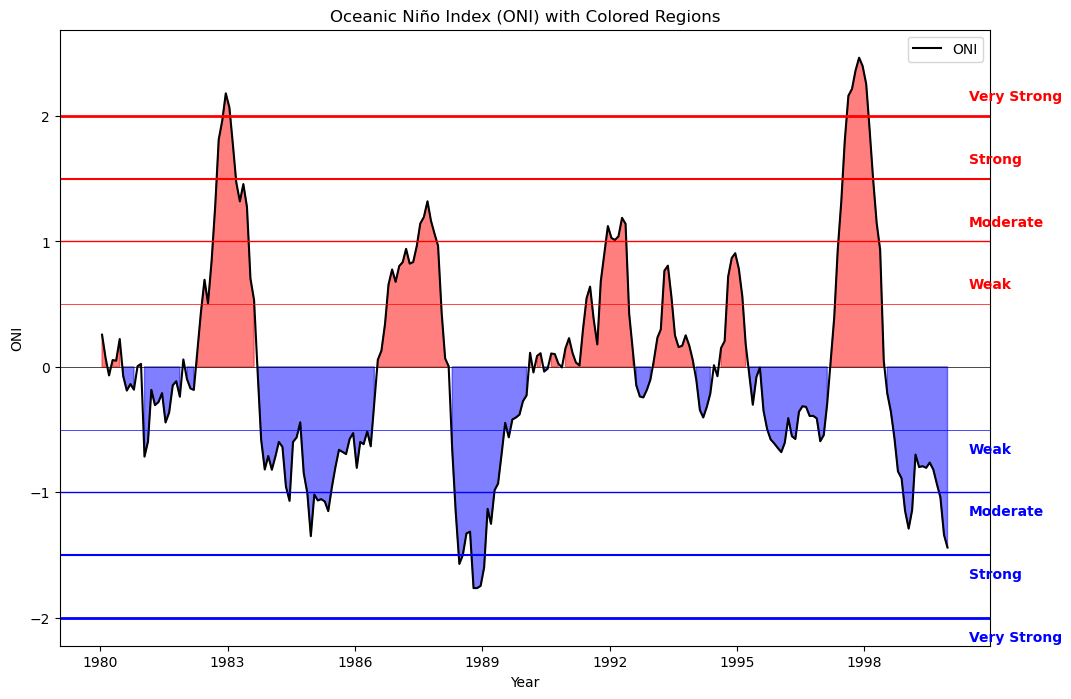

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime, timedelta

oni_values = ts_obs_anm.data  # Extract the ONI data as a numpy array
times = ts_obs_anm.coord('time').points  # Extract the corresponding time points

# Convert days since 1850-01-01 to years
base_date = datetime(1850, 1, 1)
dates = [base_date + timedelta(days=int(day)) for day in ts_obs_anm.coord('time').points]

# Convert to years for plotting
years = np.array([date.year + (date - datetime(date.year, 1, 1)).days / 365.0 for date in dates])

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ONI line
ax.plot(years, oni_values, color='black', label='ONI')

# Fill the regions above and below zero
ax.fill_between(years, oni_values, where=(oni_values > 0), color='red', alpha=0.5)
ax.fill_between(years, oni_values, where=(oni_values < 0), color='blue', alpha=0.5)

# Adding labels and title
ax.axhline(0, color='black', linewidth=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('ONI')
ax.set_title('Oceanic Niño Index (ONI)')
ax.legend()

# Add red horizontal lines with labels
for value, label in [(0.5, 'Weak'), (1, 'Moderate'), (1.5, 'Strong'), (2, 'Very Strong')]:
    ax.axhline(y=value, color='red', linestyle='-', linewidth=value)  # Thickness increases with value
    ax.text(years[-1] + 0.5, value + 0.1, label, color='red', va='bottom', ha='left', fontsize=10, fontweight='bold')

# Add blue horizontal lines with labels
for value, label in [(-0.5, 'Weak'), (-1, 'Moderate'), (-1.5, 'Strong'), (-2, 'Very Strong')]:
    ax.axhline(y=value, color='blue', linestyle='-', linewidth=-value)  # Thickness increases with absolute value
    ax.text(years[-1] + 0.5, value - 0.1, label, color='blue', va='top', ha='left', fontsize=10, fontweight='bold')

# Format the x-axis to show years
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Show the plot
plt.show()